In [1]:
import numpy as np
import wave_model as wm
import matplotlib.pyplot as plt

Setup an initial wave at each period and setup the test depths as an array.

In [2]:
#5, 10, 15, and 20 second period waves with an amplitude of 0.5 meters
wave5 = wm.wave_solver(5,300,0.5)
wave10 = wm.wave_solver(10,300,0.5)
wave15 = wm.wave_solver(15,300,0.5)
wave20 = wm.wave_solver(20,300,0.5)

#testing depths every 5 meters between 5m and 300m
test_depths = []
for i in range(1,301,2):#5-300 at 5 ft intervals
    test_depths.append(i)

Calculate the wave heights, cycling through each incident angle for all depths

In [5]:
#setup dictionaries to store test results
wave5_heights={"angle 0":[],"angle 30":[],"angle 60":[]}
wave10_heights={"angle 0":[],"angle 30":[],"angle 60":[]}
wave15_heights={"angle 0":[],"angle 30":[],"angle 60":[]}
wave20_heights={"angle 0":[],"angle 30":[],"angle 60":[]}

#cycle through all depths
for depth in test_depths:
    shoal_coefficient5 = wave5.shoaling_coefficient(depth)
    shoal_coefficient10 = wave10.shoaling_coefficient(depth)
    shoal_coefficient15 = wave15.shoaling_coefficient(depth)
    shoal_coefficient20 = wave20.shoaling_coefficient(depth)

    #angles to test waves
    angle_names = ["angle 0","angle 30","angle 60"];angles=[0,30,60]#measuring input angle to perpendicular
    
    #cycle through angles 0, 30, 60
    for i in range(len(angles)):
        #calculate heights for each wave
        ref_coefficient = wave5.refraction_coefficient(angles[i],shoal_coefficient5)
        wave5_heights[angle_names[i]].append(wave5.initial_amplitude * 2 / shoal_coefficient5 / ref_coefficient)
        
        ref_coefficient = wave10.refraction_coefficient(angles[i],shoal_coefficient10)
        wave10_heights[angle_names[i]].append(wave10.initial_amplitude * 2 / shoal_coefficient10 / ref_coefficient)
        
        
        ref_coefficient = wave15.refraction_coefficient(angles[i],shoal_coefficient15)
        wave15_heights[angle_names[i]].append(wave15.initial_amplitude * 2 / shoal_coefficient15 / ref_coefficient)
        
        
        ref_coefficient = wave20.refraction_coefficient(angles[i],shoal_coefficient20)
        wave20_heights[angle_names[i]].append(wave20.initial_amplitude * 2 / shoal_coefficient20 / ref_coefficient)

Generate Charts for each wave period showing comparative effects of shoaling and refraction

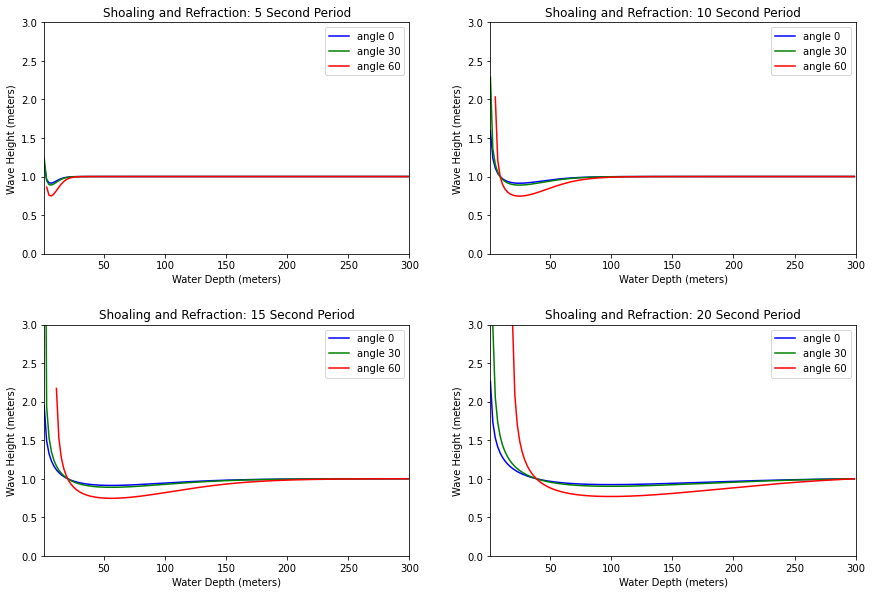

In [31]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2,figsize=(12, 8))
fig.tight_layout(h_pad=5,w_pad=5)

axs1.set_title("Shoaling and Refraction: 5 Second Period")
axs2.set_title("Shoaling and Refraction: 10 Second Period")
axs3.set_title("Shoaling and Refraction: 15 Second Period")
axs4.set_title("Shoaling and Refraction: 20 Second Period")

colors = ["blue","green","red"]
#cycle through angles 0, 30, 60
for i in range(len(angles)):
    axs1.plot(test_depths, wave5_heights[angle_names[i]],color=colors[i],label=angle_names[i])
    axs2.plot(test_depths, wave10_heights[angle_names[i]],color=colors[i],label=angle_names[i])
    axs3.plot(test_depths, wave15_heights[angle_names[i]],color=colors[i],label=angle_names[i])
    axs4.plot(test_depths, wave20_heights[angle_names[i]],color=colors[i],label=angle_names[i])

for axs in fig.get_axes():
    axs.set(xlabel="Water Depth (meters)", ylabel="Wave Height (meters)")
    axs.set_ylim(0, 3)
    axs.set_xlim(1, 300)
    axs.legend(loc='upper right')
    
plt.show()

# Conclusions 
Shoaling: The general effects of shoaling seem to match the expectation that wave height will increase as the waves move into shallow water and slow. As we discussed in class, the wave height initially goes down as the wave enters the transitional depth, then increases sharply as the depth gets closer to the wavelength.

Similarly, the general effect of refraction reduces wave heights in shallow water which matches expectations.  The refraction angle reduces the wave height at first, but then the wave height increases more rapidly, appearing to speed and amplify the effects of shoaling.